## kmeans

- initialize random cluster centers
- iterate
  - update cluster labels: assign labels of all points with the closest cluster
  - update cluster centers: generate new centers of clusters

<div>
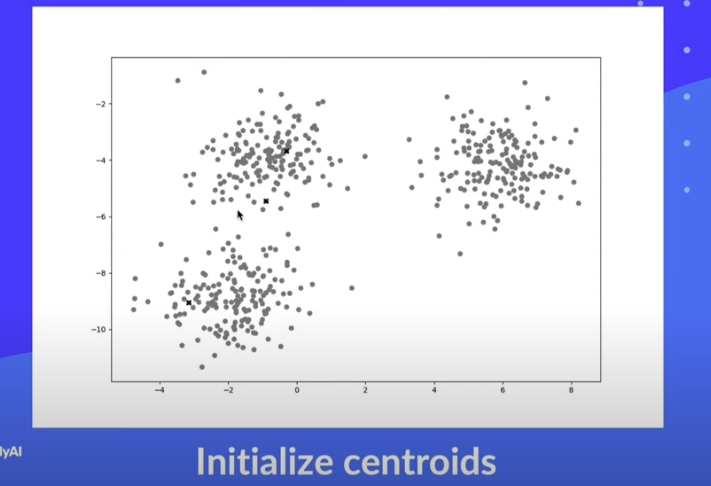
</div>



<div>
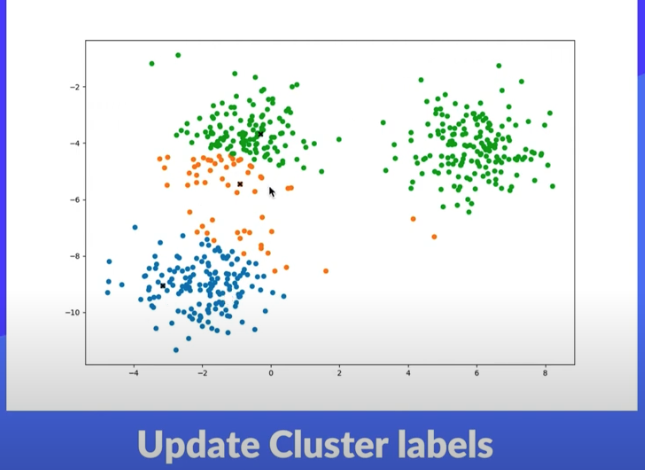
</div>


<div>
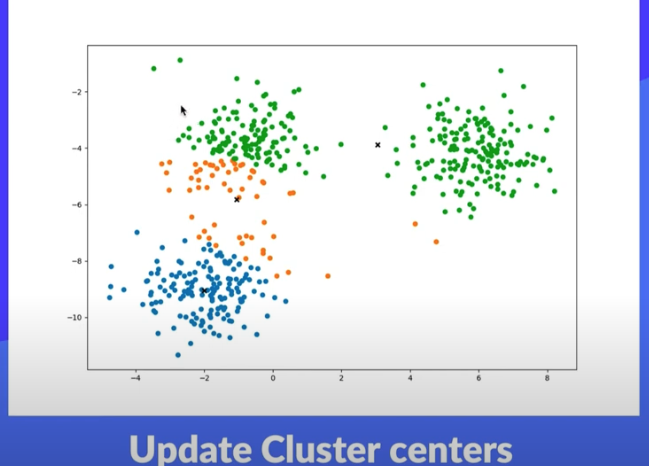
</div>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:


class KMeans():
    def __init__(self, K, max_iters, plot_steps=True):
        self.K = K
        self.max_iters = max_iters
        # for ploting
        self.plot_steps = plot_steps

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape[0], X.shape[1]

        # initialize random cluster centers
        # cluster: [[], [], ....] - size of k
        self.cluster = [[] for _ in range(self.K)]
        
        # centroids: [[x1, x2], [y1, y2], ....] - size of k
        centroid_idx = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [X[idx] for idx in centroid_idx]
                  
        # iterate
        for _ in range(self.max_iters):
            
            ##update cluster labels: assign labels of all points with the closest cluster
            self.clusters = self.create_cluster(X, self.centroids)
            
            ##update cluster centers: generate new centers of clusters
            prev_centroids = self.centroids
            self.centroids = self.update_centers(X, self.clusters)

            if self._is_converged(prev_centroids, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self._get_cluster_labels(self.cluster)

    def create_cluster(self, X, centroids):
        # for each sample
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(X):
            
            ## calculate distance to each centroids
            closest_centroid_idx = self.calculate_distance(sample, centroids)
            
            ## append to the cluster with smallest distance
            clusters[closest_centroid_idx].append(idx)
            
        return clusters

    def calculate_distance(self, sample, centroids):
        # method 1
        min_dis = float("inf")
        closest_idx = None
        for idx, centroid in enumerate(centroids):
            dis = self.euclidean_distance(sample, centroid)
            if dis < min_dis: 
                closest_idx = idx
                min_dis = dis

        # method 2
        # distances = [self.euclidean_distance(sample, point) for point in centroids]
        # closest_idx = np.argmin(distances)
        
        return closest_idx
            
    def update_centers(self, X, clusters):
        centorids = [np.mean(X[cluster], axis=0) for cluster in clusters]
        return centorids

    def euclidean_distance(self, sample, centroid):
        return np.sqrt(np.sum((sample - centroid) ** 2))


    ############ helper functions ##############
    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


    


In [82]:
## test
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

(500, 2)
3


In [83]:
y[:10]

array([0, 1, 2, 2, 1, 1, 0, 0, 0, 0])

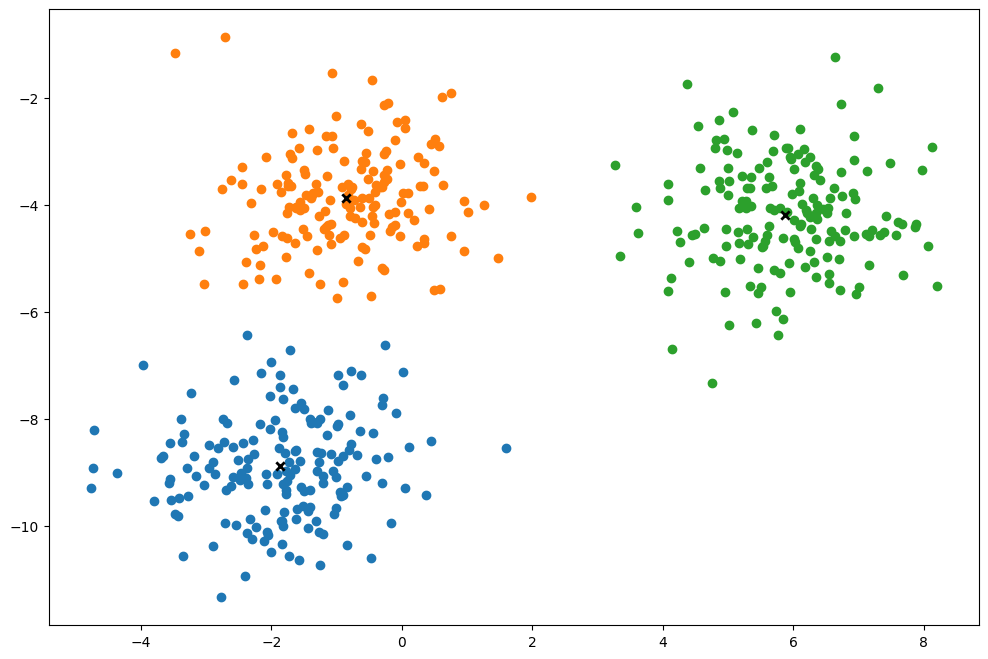

In [84]:
k = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred = k.predict(X)
k.plot()

In [85]:
y_pred[:30]

array([0.00000000e+000, 1.69264133e-139, 0.00000000e+000, 3.52683921e+233,
       4.45197005e+252, 2.00877238e-139, 2.00877668e-139, 6.01391519e-154,
       8.86980560e+247, 2.04912601e+190, 8.39833674e-095, 7.52224707e+199,
       1.05879648e-153, 5.03274632e+175, 6.01391519e-154, 1.99561118e+174,
       7.47730004e+247, 6.18737688e+223, 6.01099946e+175, 6.18473383e+223,
       1.06097697e-153, 1.69592865e-152, 5.03274632e+175, 6.01347002e-154,
       2.87520335e+161, 9.00495264e+130, 1.29191726e+171, 3.10955392e+175,
       4.34260183e-114, 5.03274632e+175])